# **Instalowanie potrzebnych komponentów**

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


# **Problem maksymalizacji prądu w układzie**
Określamy jaki maksymalny prąd może popłynąć poprzez układ z wskazanymi ograniczeniami.
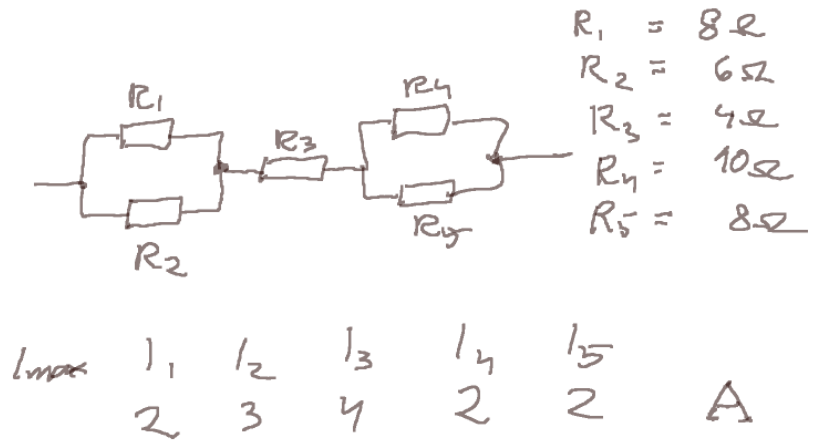

Stosując ograniczenia prądów jak i oba prawa Kirchhoffa obliczamy maksymalny prað w układzie.

In [3]:
from pulp import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

prob = LpProblem("Max_prad",LpMaximize)

i1 = LpVariable("Prad_1",0,2)
i2 = LpVariable("Prad_2",0,3)
i3 = LpVariable("Prad_3",0,4)
i4 = LpVariable("Prad_4",0,2)
i5 = LpVariable("Prad_5",0,2)

prob += i1 + i2 == i3, "Max prąd1"
prob += i3 == i4 + i5, "Max prąd2"

prob += i1*8 == i2*6
prob += i5*8 == i4*10

prob += i3

prob.writeLP("MostekModel.lp")
prob.solve()

print ("Status:", LpStatus[prob.status])

print("Max prąd = ",value(prob.objective) ,"A")
for v in prob.variables():
    print (v.name, "=", v.varValue)


Status: Optimal
Max prąd =  3.6 A
Prad_1 = 1.5428571
Prad_2 = 2.0571429
Prad_3 = 3.6
Prad_4 = 1.6
Prad_5 = 2.0
